In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [300]:
pwd

'C:\\Users\\nghoc\\Desktop'

In [301]:
df = pd.read_csv('money.csv')

In [302]:
df.head()

,Date,Income/Expenses,Category,Memo,Amount
0,2020-12-21,Income,Salary,NaN,180.00
1,2020-12-20,Expenses,Electronics,NaN,-2.99
2,2020-12-20,Expenses,Food,NaN,-2.60
3,2020-12-18,Income,Salary,NaN,75.00
4,2020-12-17,Expenses,Food,NaN,-2.60


In [288]:
df['Amount'] = abs(df['Amount'])

In [303]:
df['Date'] = pd.to_datetime(df['Date'])

In [304]:
def year(x):
    return x.year
df['Year'] = df['Date'].apply(year)
def mth(x):
    dmap = {1:'/01',2:'/02',3:'/03',4:'/04',5:'/05',6:'/06',7:'/07',8:'/08',9:'/09',10:'/10',11:'/11',12:'/12'}
    return dmap[x.month]
df['Month'] = df['Date'].apply(mth)

In [305]:
df.head()

,Date,Income/Expenses,Category,Memo,Amount,Year,Month
0,2020-12-21,Income,Salary,NaN,180.00,2020,/12
1,2020-12-20,Expenses,Electronics,NaN,-2.99,2020,/12
2,2020-12-20,Expenses,Food,NaN,-2.60,2020,/12
3,2020-12-18,Income,Salary,NaN,75.00,2020,/12
4,2020-12-17,Expenses,Food,NaN,-2.60,2020,/12


In [306]:
df['MY'] = df['Year'].map(str) + df['Month']

In [307]:
df.head()

,Date,Income/Expenses,Category,Memo,Amount,Year,Month,MY
0,2020-12-21,Income,Salary,NaN,180.00,2020,/12,2020/12
1,2020-12-20,Expenses,Electronics,NaN,-2.99,2020,/12,2020/12
2,2020-12-20,Expenses,Food,NaN,-2.60,2020,/12,2020/12
3,2020-12-18,Income,Salary,NaN,75.00,2020,/12,2020/12
4,2020-12-17,Expenses,Food,NaN,-2.60,2020,/12,2020/12


In [309]:
sumMonths = df.groupby(['MY', 'Income/Expenses']).sum()

In [310]:
sumCategory = df.groupby('Category').sum()

In [311]:
cm = df.pivot_table(aggfunc='sum', values='Amount', index=['MY'], columns=['Category'])

In [312]:
sm = df.pivot_table(aggfunc='sum', values='Amount', index=['MY'], columns=['Income/Expenses'])

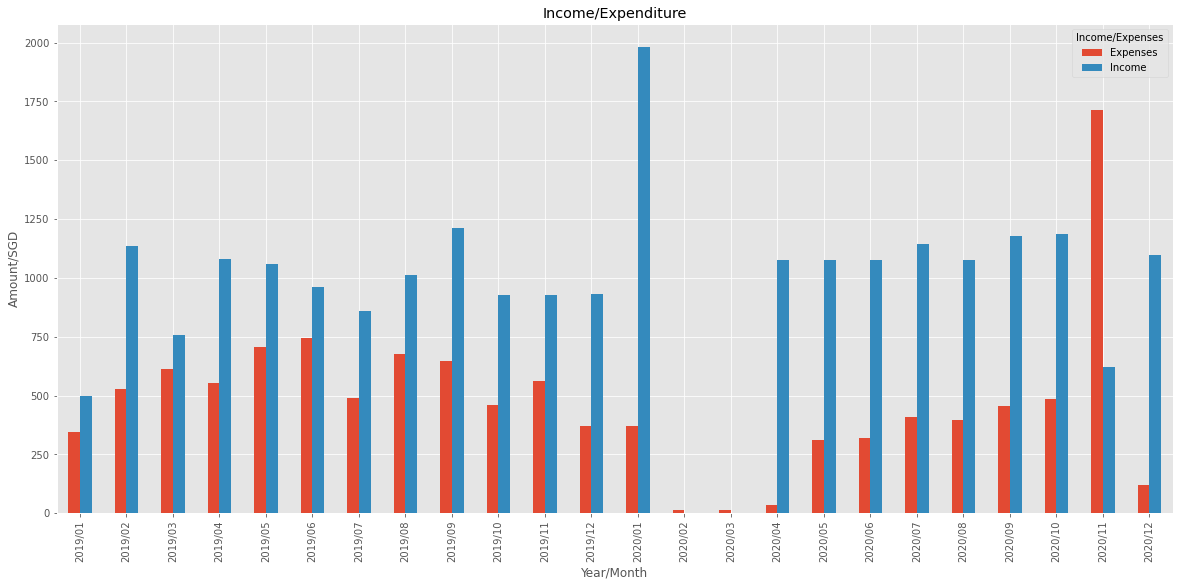

In [298]:
plt.style.use('ggplot')
x = sm.plot.bar(figsize=(20,9),\
            title= 'Income/Expenditure',\
            ylabel='Amount/SGD',\
            xlabel='Year/Month')

In [313]:
cm

Category,Awards,Book,Clothing,Electronics,Entertainment,Food,Gift,Health,Home,Investments,Office,Others,Salary,Shopping,Sport,Transportation,Travel,army,cny,etc
MY,,,,,,,,,,,,,,,,,,,,
2019/01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-300.0,NaN,NaN,NaN,500.0,NaN,NaN,NaN,NaN,NaN,NaN,-47.0
2019/02,NaN,NaN,-60.00,-125.00,-11.70,-28.15,NaN,NaN,-300.0,NaN,NaN,576.00,560.0,NaN,NaN,NaN,NaN,NaN,NaN,-2.6
2019/03,NaN,NaN,NaN,NaN,-6.00,-70.85,-100.0,NaN,NaN,200.00,NaN,-300.00,559.2,-83.37,NaN,-39.20,NaN,NaN,NaN,-12.9
2019/04,NaN,NaN,NaN,NaN,-24.00,-91.58,-50.0,NaN,-300.0,NaN,-4.0,-1.30,1081.0,NaN,NaN,-64.75,NaN,NaN,NaN,-16.0
2019/05,NaN,NaN,-5.00,NaN,-11.80,-52.85,-40.0,-72.8,-300.0,NaN,NaN,NaN,1059.2,NaN,NaN,-22.10,-200.0,NaN,NaN,NaN
2019/06,NaN,NaN,NaN,NaN,-7.02,-87.50,NaN,NaN,-300.0,NaN,NaN,-4.00,959.2,NaN,-78.03,-65.75,NaN,-200.50,NaN,NaN
2019/07,NaN,-17.7,-50.70,NaN,NaN,-71.90,NaN,NaN,-300.0,NaN,NaN,NaN,859.2,NaN,NaN,-10.00,NaN,-37.15,NaN,NaN
2019/08,NaN,-34.9,-27.98,NaN,-2.00,-84.65,-175.0,NaN,-300.0,NaN,NaN,NaN,1010.0,NaN,-34.90,-10.00,NaN,-7.80,NaN,NaN
2019/09,80.0,-22.0,-20.00,-39.00,-13.00,-111.95,NaN,NaN,-300.0,205.00,NaN,NaN,926.2,NaN,NaN,-25.00,NaN,-117.80,NaN,NaN


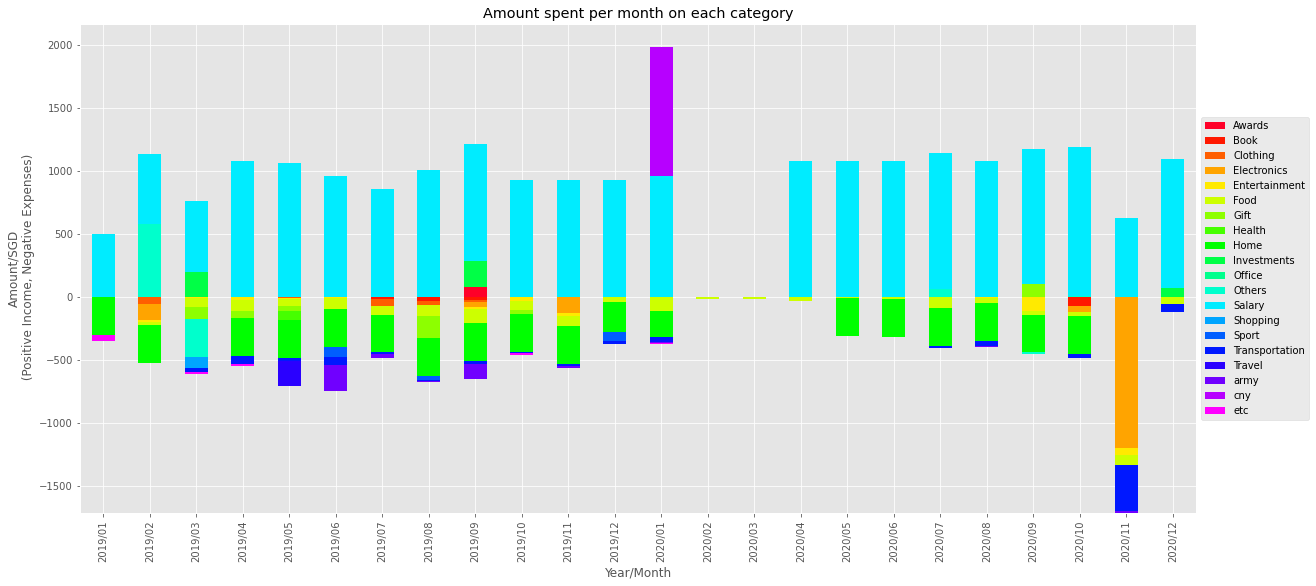

In [315]:
colors = plt.get_cmap('gist_rainbow')
x=[]
for i in range(20):
    x.append(colors((1*i)/20))
cm.plot.bar(figsize=(20,9),\
            title= 'Amount spent per month on each category',\
            ylabel='Amount/SGD\n (Positive Income, Negative Expenses)',\
            xlabel='Year/Month',\
            stacked=True,\
            color=x)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))